# PROBABILITY & HYPOTHESIS PRACTICE

### The probability distributions are practised by hand. This workbook has the practice performed using python. The distributions are brodly classified into discrete and continuous probability distributions. 

### After studying each distribution i have solved few questions to explore the options using scipy package.

### I thank the authors of various books read by me to reach this level of clarity in the topics below.

# Binomial Distribution

An unbiased coin is tossed 5 times. Find the probability that the tosses result in
1. All heads
2. 3 heads

In [19]:
# Load the stats from scipy package
from scipy.stats import bernoulli, binom, poisson, expon
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import pandas as pd
import seaborn as sn
from IPython.core.display import Image, display

From the statement its clear that:
a. n parameter is 5
b. p parameter is 1/2 (symmetrical binomial dist.)

The p.m.f (probability mass function) using python.

In [5]:
all_heads=binom.pmf(5,5,0.5)
print("all_heads = ",all_heads*100,"%")

all_heads =  3.125 %


In [7]:
three_heads=binom.pmf(3,5,0.5)
print("three_heads = ",three_heads*100,"%")

three_heads =  31.25 %


In [8]:
four_heads=binom.pmf(4,5,0.5)
print("four_heads = ",round(four_heads*100),"%")

four_heads =  16.0 %


## Vizulaizing how pmf varies with number of trails.
Say a 20 customers have bought apparels from e commerce website.
10% will return the apparel then what is the probability of 5 people will return:

### The probability of 5 people will return

In [9]:
print("The probability of 5 people will return = ",round(binom.pmf(5,20,0.1)*100,2),"%") # expected trails = 5 , total trails = 20, 10%


The probability of 5 people will return =  3.19 %


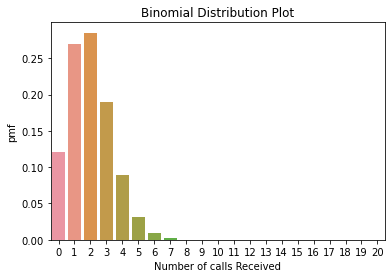

In [10]:
pmf_df=pd.DataFrame({'Success': range(0,21), 'pmf':list(binom.pmf(range(0,21),20,0.1))})

# creating the barplot with number of calls as x and pmf as y
sn.barplot(x=pmf_df.Success, y=pmf_df.pmf);
plt.title('Binomial Distribution Plot')
plt.xlabel('Number of calls Received');

Let us see out of 20 customers how the PMF will vary?

In [11]:
@widgets.interact(n=(0,20),p=(0.0,0.1),samples=(1,100), continuous_update=False)
def plot_pmf(n, p,samples=100,histogram=False):
    '''
    Plot the probability mass function of Binom(n, p)
    '''
    k = np.arange(0, n + 1)
    P_binom = binom.pmf(k, n, p)
    # This plots a bar plot
    # plt.bar(k, P_binom,color='b')
    plt.plot(k, P_binom, '-o', color='r')
    if histogram:
        height,y = np.histogram(binom.rvs(size=samples,n=n,p=p),range=(0,n),bins=n+1,normed=True)
        plt.bar(k,height,color='r')
    plt.title('PMF of Bin(%i, %.2f)' % (n, p))
    plt.xlabel('k')
    plt.ylabel('$B_{20,0.3}(k)$')
    plt.show()

interactive(children=(IntSlider(value=10, description='n', max=20), FloatSlider(value=0.05, description='p', m…

### Probability that maximum of 5 people will return can be found via CDF

In [12]:
print("The probability that maximum of 5 people will return = ",round(binom.cdf(5,20,0.1)*100,2),"%")

The probability that maximum of 5 people will return =  98.87 %


### Probability that more than 5 people will return can be found 1-q

In [13]:
print("The probability that more than 5 people will return = ",round((1-binom.cdf(5,20,0.1))*100,2),"%")

The probability that more than 5 people will return =  1.13 %


### Average number of customer likely to "return" the items, the variance and SD of the returned items.

In [14]:
mean, variance = binom.stats(20, 0.1)

In [15]:
print("Average: ",mean,"| Variance: ",variance,"| SD: ",round(np.sqrt(variance),2))

Average:  2.0 | Variance:  1.8 | SD:  1.34


# Poission distribution

The number of call to a call center follows a poission distribution at 10 call per hour.
1. calculate the probabillity that the number of call will be maximum 5
2. calculate the probabillity that the number of call over a 3 hour period will exceed 30

In [16]:
poisson.cdf(5,10)

0.06708596287903189

In [17]:
print("The probability is: ",round(1-poisson.cdf(30,30),2))

The probability is:  0.45


To see the poisson distribution for the average call per hour as 10,
we can plot PMF for all the possible number of calls, 
the call center can receive ranging from 0 to 30.

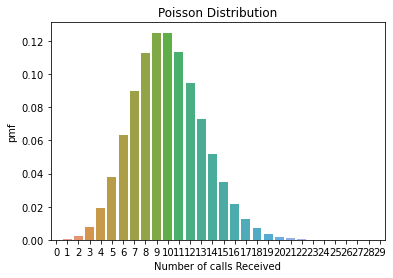

In [18]:
pmf_df=pd.DataFrame({'Success': range(0,30), 'pmf':list(poisson.pmf(range(0,30),10))})

# creating the barplot with number of calls as x and pmf as y
sn.barplot(x=pmf_df.Success, y=pmf_df.pmf);
plt.title('Poisson Distribution')
plt.xlabel('Number of calls Received');

# Exponential distribution

The distribution is a single parameter continuous ditribution that is traditionally used for modeling time to failure of electronic components. The exponential dist. represents a process in which events occur continuously and independently at a constant average rate.

The time to failure of an avionic system follows an exponential distribution with a mean time between failures (MTBF) of 1000 hours. 

1. The prob that the system will fail before 1000 hours
2. The prob the it will fail upto 2000 hours
3. The time by which 10% of the system will fail. (P10 life)


the below function takes the number of hours, mean and scale of the expo dist.

In [22]:
print("The probability value is:",expon.cdf(1000, loc=1/1000, scale=1000))

The probability value is: 0.6321201909489326


In [23]:
print("The probability value for NOT FAIL upto 2000 is:",1-expon.cdf(2000, loc=1/1000, scale=1000))

The probability value for NOT FAIL upto 2000 is: 0.13533541857196352


In [26]:
print("The time by which 10% will fail is:",expon.ppf(0.1, loc=1/1000, scale=1000)," hours, 10% system will fail.")

The time by which 10% will fail is: 105.36151565782632  hours, 10% system will fail.


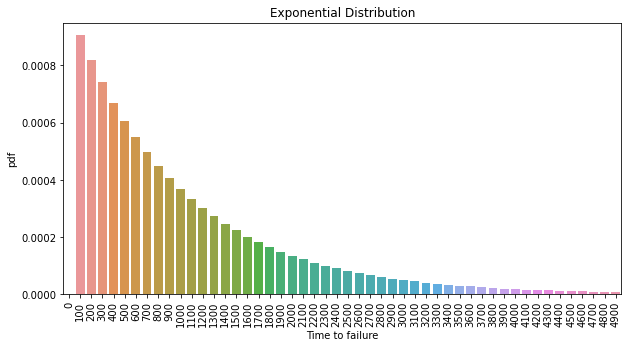

In [30]:
pdf_df=pd.DataFrame({'Success': range(0,5000, 100), 'pdf':list(expon.pdf(range(0,5000,100),loc=1/1000, scale=1000))})

# creating the barplot with number of calls as x and pmf as y
plt.figure(figsize=(10,5))
sn.barplot(x=pdf_df.Success, y=pdf_df.pdf);
plt.title('Exponential Distribution');
plt.xticks(rotation=90);
plt.xlabel('Time to failure');